In [203]:
import matplotlib.pyplot as plt 
from misc import *
import tensorflow as tf
from tqdm import tqdm
import os 
from RNN_models import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [204]:
ppp=100

In [205]:
means, covs, signals, coeffs = load_data("sanity/integration/{}/".format(ppp))
tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]
A,dt,C,D = coeffs

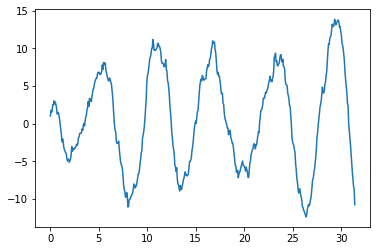

In [206]:
times = np.linspace(0,5*2*np.pi, 5*ppp)
total_time = times[-1]
plt.plot(times, means[:,0])

In [207]:
rmodel = GRNNmodel([C,dt, total_time], cov_in=tf.convert_to_tensor(covs[0].astype(np.float32)))
rmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01))
rmodel.recurrent_layer(tfsignals, initial_state=rmodel.initial_state)
rmodel.trainable_variables[0].assign(tf.convert_to_tensor(A.astype(np.float32)))

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 0.,  1.],
       [-1.,  0.]], dtype=float32)>

In [208]:
history = rmodel.fit(x=tfsignals, y=tfsignals, epochs = 10**3)

Epoch 1/1000
1/1 [==============================] - 0s 885us/step - total_loss: 0.0938 - Coeffs_A: 0.0050 - grads: -0.0028
Epoch 2/1000
1/1 [==============================] - 0s 884us/step - total_loss: 0.0931 - Coeffs_A: 0.0087 - grads: 0.0015
Epoch 3/1000
1/1 [==============================] - 0s 852us/step - total_loss: 0.0924 - Coeffs_A: 0.0121 - grads: 0.0027
Epoch 4/1000
1/1 [==============================] - 0s 869us/step - total_loss: 0.0917 - Coeffs_A: 0.0127 - grads: 0.0095
Epoch 5/1000
1/1 [==============================] - 0s 864us/step - total_loss: 0.0912 - Coeffs_A: 0.0109 - grads: 0.0102
Epoch 6/1000
1/1 [==============================] - 0s 868us/step - total_loss: 0.0904 - Coeffs_A: 0.0080 - grads: 0.0148
Epoch 7/1000
1/1 [==============================] - 0s 870us/step - total_loss: 0.0891 - Coeffs_A: 0.0045 - grads: 0.0176
Epoch 8/1000
1/1 [==============================] - 0s 863us/step - total_loss: 0.0880 - Coeffs_A: 5.5028e-04 - grads: 0.0236
Epoch 9/1000
1/1 [=

Epoch 67/1000
1/1 [==============================] - 0s 849us/step - total_loss: 0.1985 - Coeffs_A: -0.2801 - grads: 0.1236
Epoch 68/1000
1/1 [==============================] - 0s 833us/step - total_loss: 0.2204 - Coeffs_A: -0.2805 - grads: -1.2688
Epoch 69/1000
1/1 [==============================] - 0s 846us/step - total_loss: 0.1812 - Coeffs_A: -0.2811 - grads: -0.1782
Epoch 70/1000
1/1 [==============================] - 0s 852us/step - total_loss: 0.1796 - Coeffs_A: -0.2837 - grads: 0.5446
Epoch 71/1000
1/1 [==============================] - 0s 881us/step - total_loss: 0.1815 - Coeffs_A: -0.2887 - grads: 0.7790
Epoch 72/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.1751 - Coeffs_A: -0.2947 - grads: 0.5093
Epoch 73/1000
1/1 [==============================] - 0s 887us/step - total_loss: 0.1640 - Coeffs_A: -0.3011 - grads: 0.2354
Epoch 74/1000
1/1 [==============================] - 0s 833us/step - total_loss: 0.1596 - Coeffs_A: -0.3058 - grads: -0.3020
Epoch 7

1/1 [==============================] - 0s 924us/step - total_loss: 0.0274 - Coeffs_A: -0.3945 - grads: 0.0874
Epoch 133/1000
1/1 [==============================] - 0s 842us/step - total_loss: 0.0556 - Coeffs_A: -0.3940 - grads: -0.3251
Epoch 134/1000
1/1 [==============================] - 0s 828us/step - total_loss: 0.0593 - Coeffs_A: -0.3941 - grads: -0.1804
Epoch 135/1000
1/1 [==============================] - 0s 808us/step - total_loss: 0.0587 - Coeffs_A: -0.3945 - grads: -0.1814
Epoch 136/1000
1/1 [==============================] - 0s 840us/step - total_loss: 0.0523 - Coeffs_A: -0.3962 - grads: -0.9150
Epoch 137/1000
1/1 [==============================] - 0s 846us/step - total_loss: 0.0351 - Coeffs_A: -0.3976 - grads: 0.1082
Epoch 138/1000
1/1 [==============================] - 0s 839us/step - total_loss: 0.0615 - Coeffs_A: -0.3984 - grads: 0.2322
Epoch 139/1000
1/1 [==============================] - 0s 976us/step - total_loss: 0.0684 - Coeffs_A: -0.3988 - grads: 0.1281
Epoch 140/1

1/1 [==============================] - 0s 786us/step - total_loss: 0.0829 - Coeffs_A: -0.3888 - grads: -0.3204
Epoch 198/1000
1/1 [==============================] - 0s 832us/step - total_loss: 0.0813 - Coeffs_A: -0.3882 - grads: -0.1951
Epoch 199/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0805 - Coeffs_A: -0.3877 - grads: -0.1327
Epoch 200/1000
1/1 [==============================] - 0s 833us/step - total_loss: 0.0795 - Coeffs_A: -0.3872 - grads: -0.1914
Epoch 201/1000
1/1 [==============================] - 0s 794us/step - total_loss: 0.0785 - Coeffs_A: -0.3866 - grads: -0.1471
Epoch 202/1000
1/1 [==============================] - 0s 793us/step - total_loss: 0.0779 - Coeffs_A: -0.3861 - grads: -0.1348
Epoch 203/1000
1/1 [==============================] - 0s 836us/step - total_loss: 0.0773 - Coeffs_A: -0.3855 - grads: -0.1349
Epoch 204/1000
1/1 [==============================] - 0s 843us/step - total_loss: 0.0770 - Coeffs_A: -0.3849 - grads: -0.0855
Epoch 205

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0248 - Coeffs_A: -0.3709 - grads: 0.0773
Epoch 263/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0247 - Coeffs_A: -0.3708 - grads: 0.1708
Epoch 264/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: 0.0121
Epoch 265/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -0.0266
Epoch 266/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0247 - Coeffs_A: -0.3707 - grads: -0.1158
Epoch 267/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0248 - Coeffs_A: -0.3707 - grads: -0.1667
Epoch 268/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0246 - Coeffs_A: -0.3708 - grads: -0.0437
Epoch 269/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: -0.0072
Epoch 270/1000
1/1 [======

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: 0.0010
Epoch 329/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: 5.0957e-04
Epoch 330/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: -2.8770e-05
Epoch 331/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: -5.2326e-04
Epoch 332/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: -0.0028
Epoch 333/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: -0.0028
Epoch 334/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: -5.1468e-04
Epoch 335/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3708 - grads: -1.2640e-04
Epoch

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -9.4602e-05
Epoch 393/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -1.1527e-04
Epoch 394/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -1.2282e-04
Epoch 395/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -1.2793e-04
Epoch 396/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -1.2826e-04
Epoch 397/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -1.4282e-04
Epoch 398/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -1.2711e-04
Epoch 399/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3707 - grads: -1.

1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -9.8647e-05
Epoch 457/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -1.0333e-04
Epoch 458/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -9.2402e-05
Epoch 459/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -9.2733e-05
Epoch 460/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -1.0083e-04
Epoch 461/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -9.8981e-05
Epoch 462/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -9.7423e-05
Epoch 463/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3706 - grads: -1.

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -1.1046e-04
Epoch 521/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -1.1101e-04
Epoch 522/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -1.1027e-04
Epoch 523/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -1.0940e-04
Epoch 524/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -1.0352e-04
Epoch 525/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -1.0222e-04
Epoch 526/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -9.3158e-05
Epoch 527/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3705 - grads: -1.

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -1.0577e-04
Epoch 585/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -9.4459e-05
Epoch 586/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -1.0147e-04
Epoch 587/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -1.0982e-04
Epoch 588/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -1.1918e-04
Epoch 589/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -1.0432e-04
Epoch 590/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -1.1511e-04
Epoch 591/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3704 - grads: -9.

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -1.0876e-04
Epoch 649/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -9.7364e-05
Epoch 650/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -1.0184e-04
Epoch 651/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -1.0460e-04
Epoch 652/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -1.0157e-04
Epoch 653/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -1.0236e-04
Epoch 654/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -1.1862e-04
Epoch 655/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3703 - grads: -1.

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -1.0083e-04
Epoch 713/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -1.1571e-04
Epoch 714/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -1.1484e-04
Epoch 715/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -1.2120e-04
Epoch 716/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -1.0524e-04
Epoch 717/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -1.1653e-04
Epoch 718/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -1.0177e-04
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3702 - grads: -9.

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.1699e-04
Epoch 777/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.1805e-04
Epoch 778/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.1687e-04
Epoch 779/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.0682e-04
Epoch 780/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.0632e-04
Epoch 781/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.0187e-04
Epoch 782/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.0341e-04
Epoch 783/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3700 - grads: -1.

1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.1740e-04
Epoch 841/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.1512e-04
Epoch 842/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.1796e-04
Epoch 843/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.0623e-04
Epoch 844/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.0039e-04
Epoch 845/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.0214e-04
Epoch 846/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.1308e-04
Epoch 847/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3699 - grads: -1.

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3698 - grads: -1.0897e-04
Epoch 905/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3698 - grads: -1.0797e-04
Epoch 906/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3698 - grads: -1.0387e-04
Epoch 907/1000
1/1 [==============================] - 0s 2ms/step - total_loss: 0.0245 - Coeffs_A: -0.3698 - grads: -1.1243e-04
Epoch 908/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3697 - grads: -1.1091e-04
Epoch 909/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3697 - grads: -1.1488e-04
Epoch 910/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3697 - grads: -1.2394e-04
Epoch 911/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3697 - grads: -1.

1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.0147e-04
Epoch 969/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.0400e-04
Epoch 970/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.1648e-04
Epoch 971/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.3252e-04
Epoch 972/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.2047e-04
Epoch 973/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.2063e-04
Epoch 974/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.0925e-04
Epoch 975/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.0245 - Coeffs_A: -0.3696 - grads: -1.

In [211]:
rmodel.trainable_variables

[<tf.Variable 'rnn_31/stacked_rnn_cells_31/rcell_32/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.4679587,  1.0784577],
        [-1.5354065, -0.5532068]], dtype=float32)>]

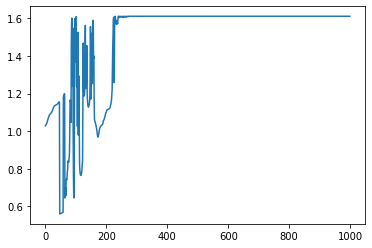

In [212]:
plt.plot(-np.log10(rmodel.history.history["total_loss"]))